In [1]:
# importing necesarry libraries
import pandas as pd
import numpy as np
pd.options.display.max_columns = None

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [10, 8]
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.shape

(891, 12)

In [6]:
#checking if dataset has any missing values
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
#now check how many missing values we have
np.round(train.isnull().sum()/len(train)*100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

    cabin contains ~77.10% of missing values
    whereas Age has 19.87% and Embarked has 0.22% missing values

## Lets do the basic descriptive analysis

In [8]:
# checking numeric features
train.describe(include='number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


    1. looks like average survival rate is 38.38%
    2. 75% of passenger don't have parent and chilren
    3. 50% of passenger have travelled alone
    4. the oldest passenger on the ship is having age of 80years
    5. the maximum fare cost on the ship was ~$512

In [9]:
# checking categorical features
train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Petranec, Miss. Matilda",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


    1. mostly male passenger were travelling on the ship and count was 577 out of 891
    2. cabin has 204 out of 891, that means people have shared the cabin
    3. mostly passenger have used S Embarked
    4. All passenger have unique names

### Univariate Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

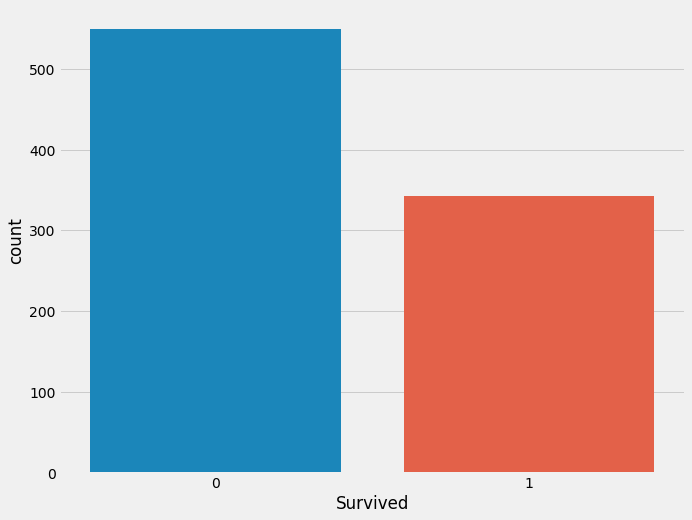

In [10]:
sns.countplot(x='Survived', data =train)

    survival rate is less, 0 = Not survived and 1 = survived

<AxesSubplot:xlabel='Sex', ylabel='count'>

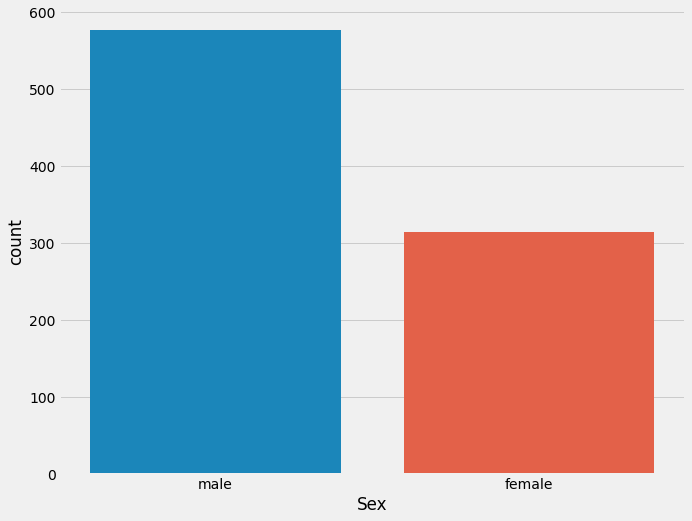

In [11]:
sns.countplot(x='Sex', data =train)

    male passenger population was more as compared to female

<AxesSubplot:xlabel='SibSp', ylabel='count'>

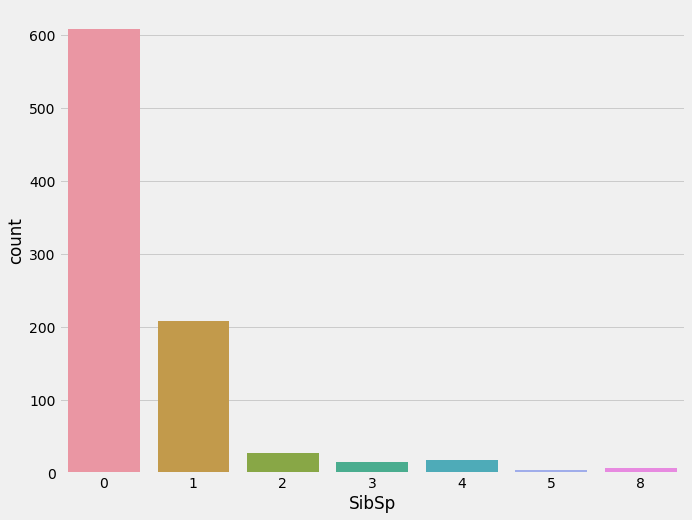

In [12]:
sns.countplot(x= 'SibSp', data = train )

<AxesSubplot:xlabel='Parch', ylabel='count'>

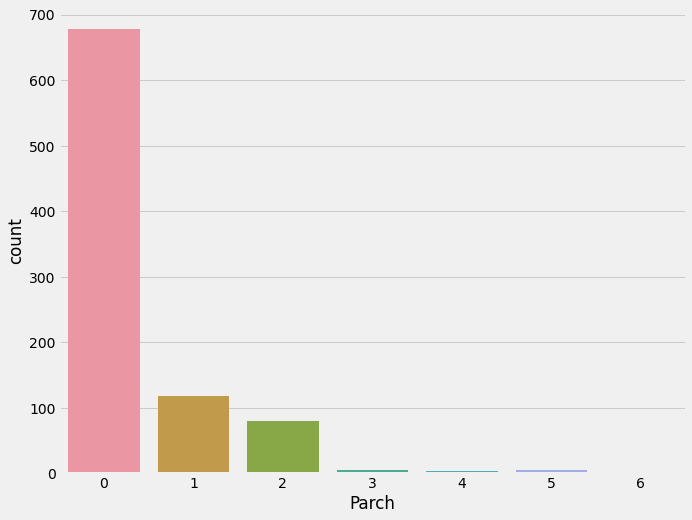

In [13]:
sns.countplot(x= 'Parch', data = train )

<AxesSubplot:xlabel='Embarked', ylabel='count'>

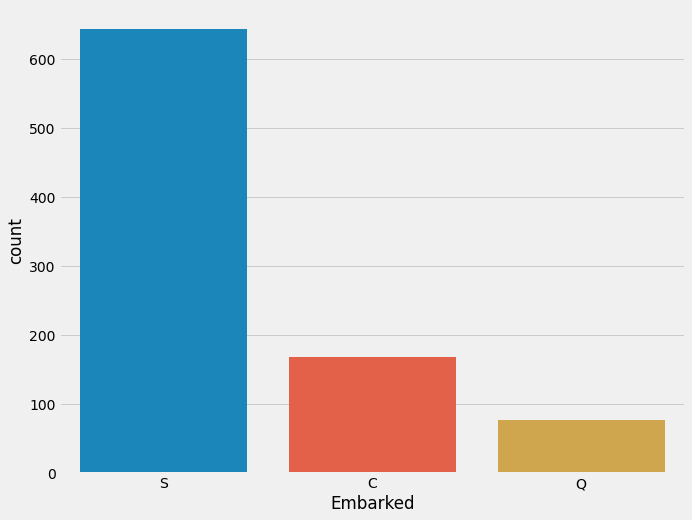

In [14]:
sns.countplot(x= 'Embarked', data = train )

### Bivariate Analysis
### Some visualization of target with Ordinal and Nominal features

<AxesSubplot:xlabel='Pclass', ylabel='count'>

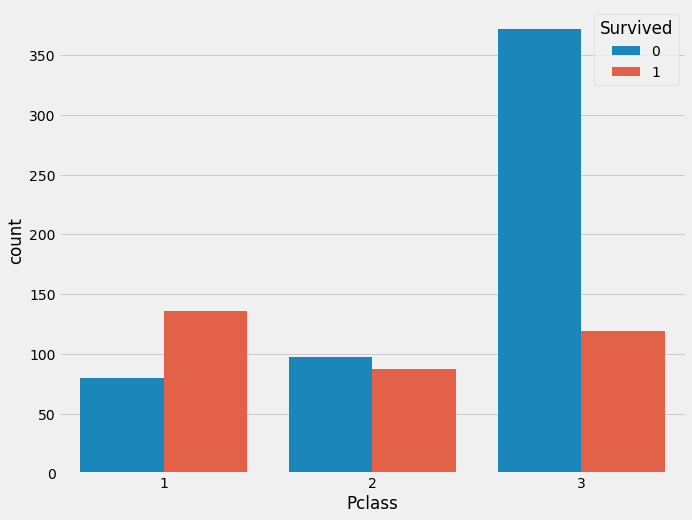

In [15]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = train)

    1. passenger staying in class 3 has very less suvival rate
    2. whereas passenger staying is class 1 has good survial rate compared to others class

<AxesSubplot:xlabel='Sex', ylabel='count'>

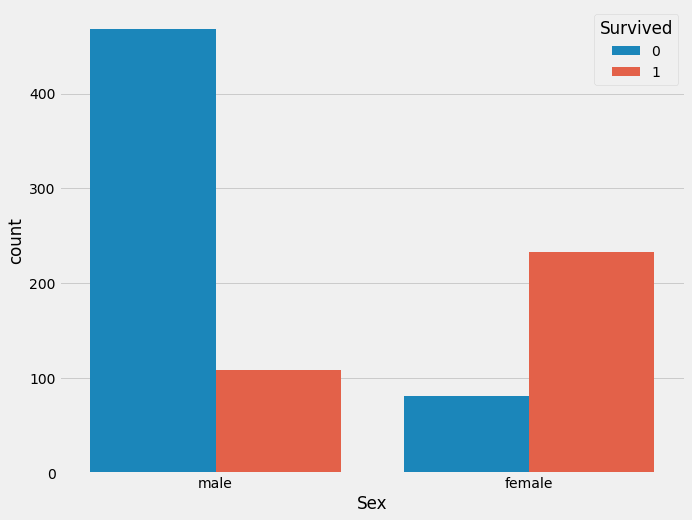

In [16]:
sns.countplot(x = 'Sex', hue = 'Survived', data = train)

    As we know in titanic male passanger have not survived as compared to female

<AxesSubplot:xlabel='SibSp', ylabel='count'>

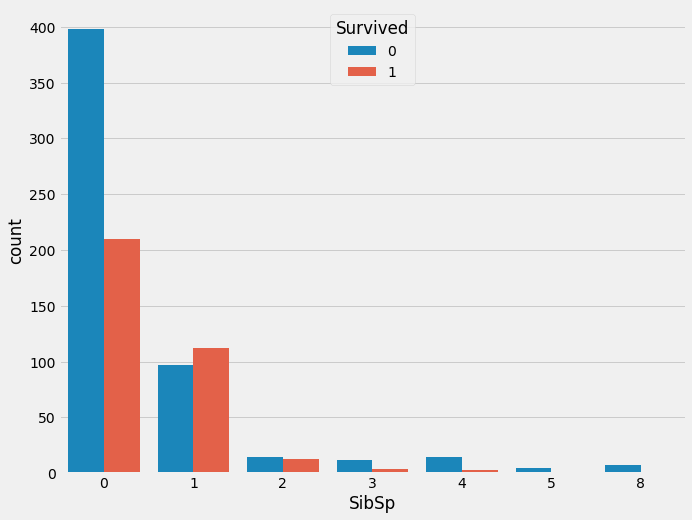

In [17]:
sns.countplot(x = 'SibSp', hue = 'Survived', data = train)

    we can clearly see the passenger who was travelling alone, has not survived as compared to passenger 
    who has Sibling and/or Spouse

<AxesSubplot:xlabel='Parch', ylabel='count'>

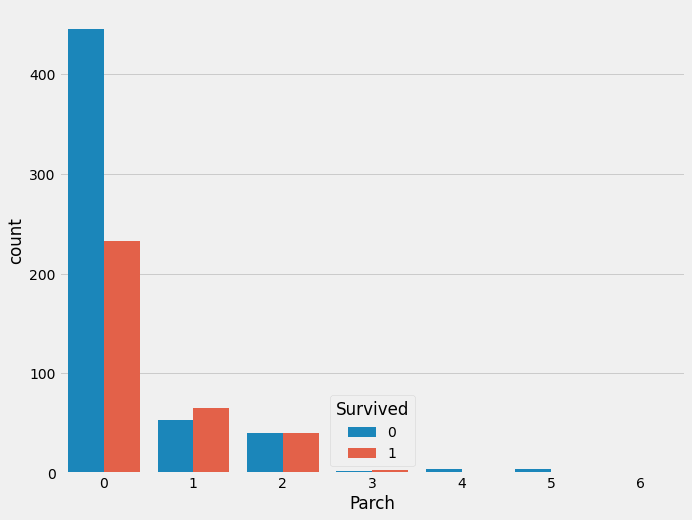

In [18]:
sns.countplot(x = 'Parch', hue = 'Survived', data = train)

    similary, passenger who travelled alone have not survived much

<AxesSubplot:xlabel='Embarked', ylabel='count'>

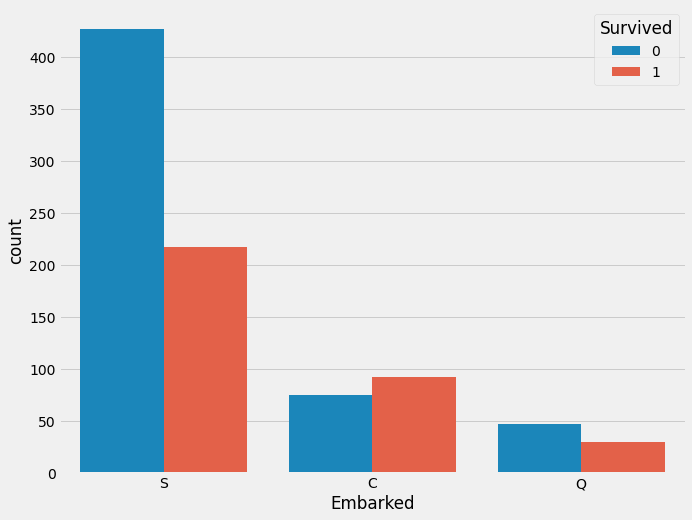

In [19]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = train)

    passenged who have ported on emnbarked S (Southampton), has less survival

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Visualization of target with Numerical features

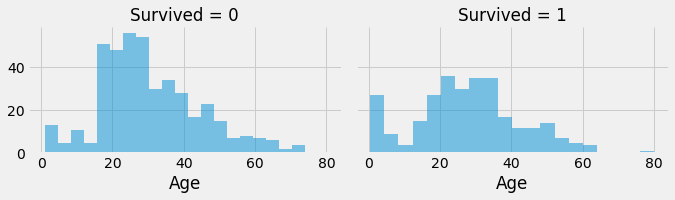

In [21]:
grid = sns.FacetGrid(train, col='Survived', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20);

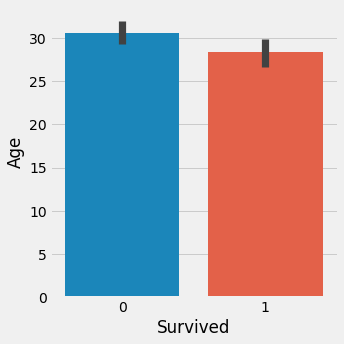

In [22]:
sns.catplot(x= 'Survived', y = 'Age', data = train, kind = 'bar');

    passenger who has not survived, most have >30 avg age 

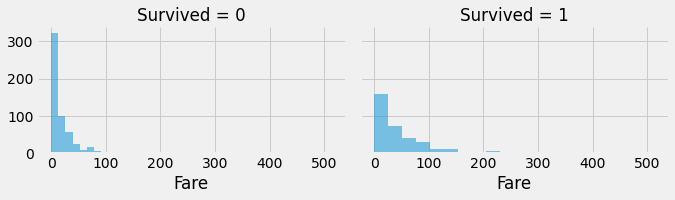

In [23]:
grid = sns.FacetGrid(train, col='Survived', aspect=1.6)
grid.map(plt.hist, 'Fare', alpha=.5, bins=20);

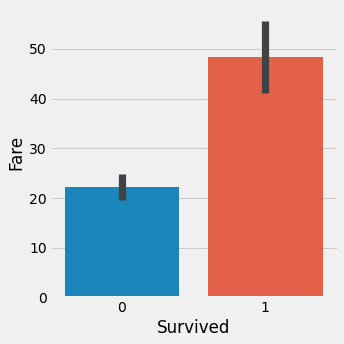

In [24]:
sns.catplot(x= 'Survived', y = 'Fare', data = train, kind = 'bar');

    passenger who has survived, have paid higher fare or belongs to higher class

### Multivariate Analsysis

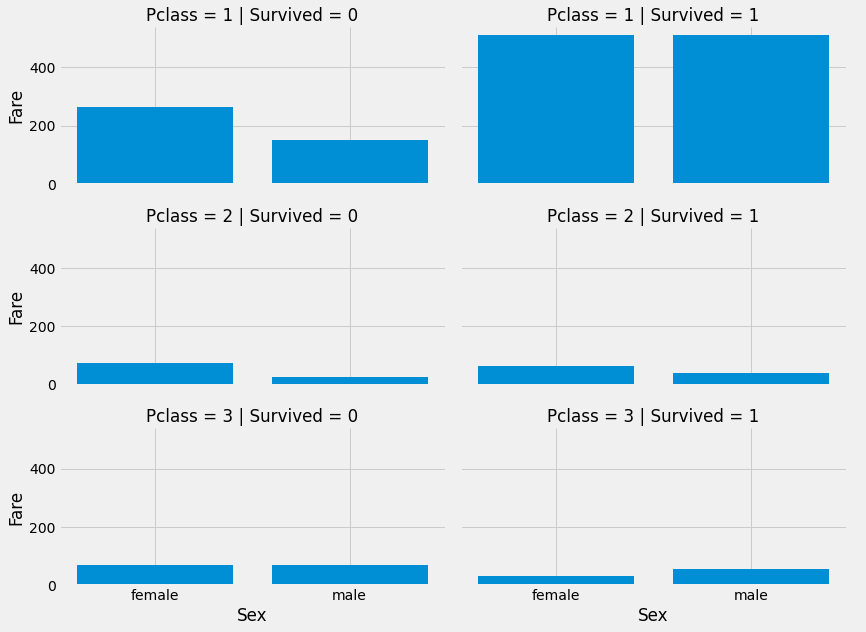

In [25]:
g = sns.FacetGrid(train, row='Pclass', col='Survived', aspect=2)
g.map(plt.bar, 'Sex', 'Fare' )
g.add_legend();

    1. Looks like passenger from class 1, who has paid more has good survival rate
    2. passenger from class 3 has poor survival rate than class 2 than class 1

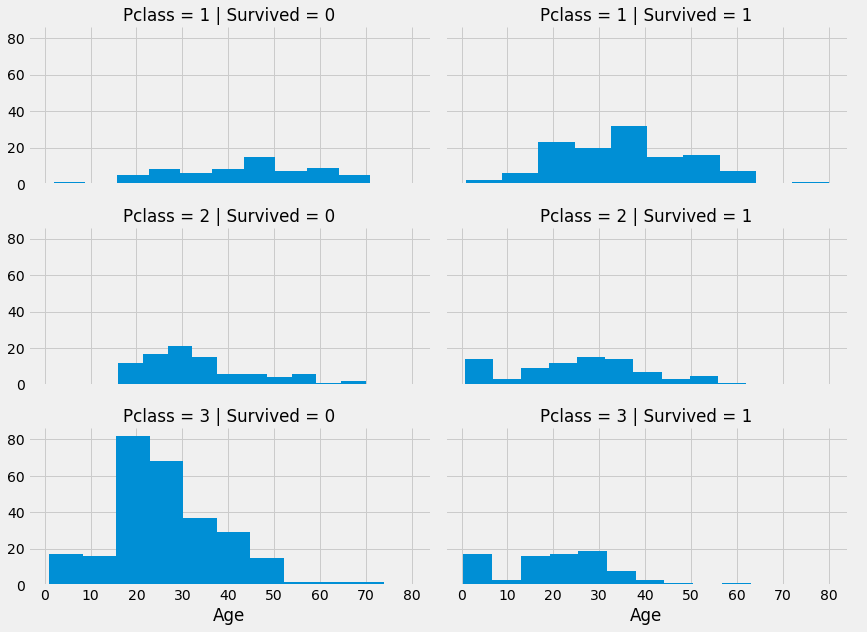

In [26]:
g = sns.FacetGrid(train, row='Pclass', col='Survived', aspect=2)
g.map(plt.hist, 'Age' )
g.add_legend();

    1. passenger from class 2 and class 3 who are teen agers or infant have survived
    2. most of the passengers from class 3 who are middle age, have not survived

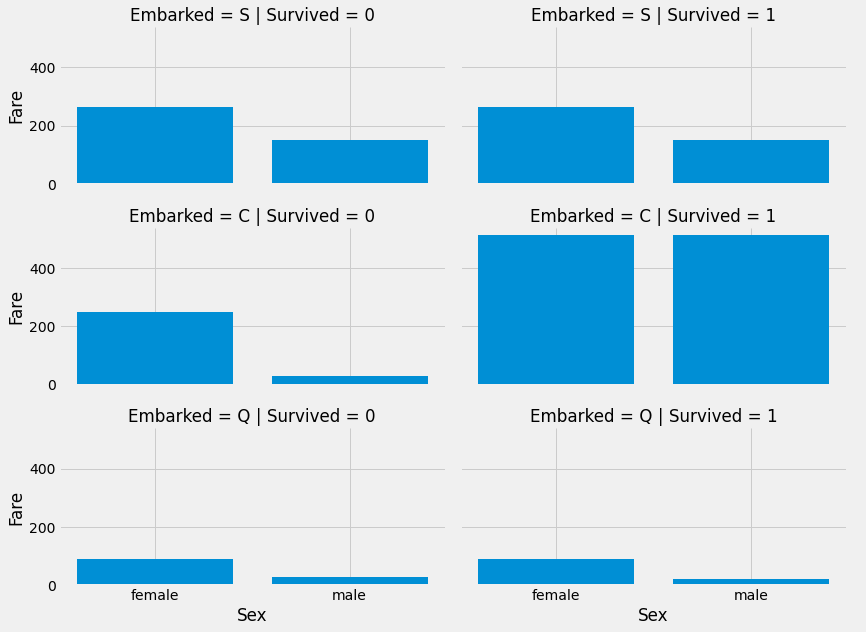

In [27]:
g = sns.FacetGrid(train, row='Embarked', col='Survived', aspect=2)
g.map(plt.bar, 'Sex', 'Fare' )
g.add_legend();

       1. higher fare paying passengers has good survival rate
       2. fare plays important role in survival

### Lets fix the train and test dataset, by comibing it in list
    1. fill missing values
    2. extract relevant information from features
    3. encode categorical features

In [28]:
train_and_test = [train, test]

In [29]:
train.groupby('Sex')[['Sex', 'Age']].median()

,Age
Sex,
female,27.0
male,29.0


In [30]:
#filling the age column with respect to Sex feature
for df in train_and_test:
    df['Age'] = train.groupby("Sex")["Age"].transform(lambda x: x.fillna(x.median())).astype(int)
#     test['Age'] = train.groupby("Sex")["Age"].transform(lambda x: x.fillna(x.median())).astype(int)

In [31]:
# filling Embarked with mode
for df in train_and_test:
    df['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
# test['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [32]:
# filling Fare with mean
for df in train_and_test:
    df["Fare"].fillna(train["Fare"].mean(), inplace=True)
# test["Fare"].fillna(train["Fare"].mean(), inplace=True)

In [33]:
# lets drop the cabin feature from both train and test as it has mostly missing values
for df in train_and_test:
    df.drop('Cabin', axis=1, inplace= True)
# test.drop('Cabin', axis=1, inplace= True)

In [34]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [35]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


### From name lets pick the titles

In [37]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [38]:
for df in train_and_test:
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.')
#     test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.')

In [39]:
# dropping Name feature from both dataset
for df in train_and_test:
    df.drop('Name', axis=1, inplace= True)
# test.drop('Name', axis=1, inplace= True)

In [40]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Mme           1
Countess      1
Don           1
Lady          1
Jonkheer      1
Capt          1
Ms            1
Sir           1
Name: Title, dtype: int64

In [41]:
for df in train_and_test:

    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                            'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [42]:
train['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: Title, dtype: int64

### encoding categorical features with numbers

In [43]:
# titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
# embarked = {'S': 0, 'C': 1, 'Q': 2}
sex = {"male": 1, "female": 0}
for df in train_and_test:
#     df['Title'] = df['Title'].map(titles).astype(int)
#     df['Title'] = df['Title'].fillna(0)
#     # mapping Embarked
#     df['Embarked'] = df['Embarked'].map(embarked).astype(int)
    # mapping Sex
    df['Sex'] = df['Sex'].map(sex).astype(int)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,1,22,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,0,38,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,0,26,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,0,35,1,0,113803,53.1000,S,Mrs
4,5,0,3,1,35,0,0,373450,8.0500,S,Mr


In [45]:
# dropping ticket feature from both dataset
for df in train_and_test:
    df.drop('Ticket', axis=1, inplace= True)

In [46]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,22,1,0,7.2500,S,Mr
1,2,1,1,0,38,1,0,71.2833,C,Mrs
2,3,1,3,0,26,0,0,7.9250,S,Miss
3,4,1,1,0,35,1,0,53.1000,S,Mrs
4,5,0,3,1,35,0,0,8.0500,S,Mr


### Lets use get dummies to encode categorical features

In [47]:
cat_features = ['Embarked', 'Title']
for col in cat_features:
    train = pd.concat([train, pd.get_dummies(train[col], prefix=col, drop_first=True)], 
        axis=1, 
        join='inner')
    train.drop(col, axis=1, inplace=True)
    
    test = pd.concat([test, pd.get_dummies(test[col], prefix=col, drop_first=True)], 
        axis=1, 
        join='inner')
    test.drop(col, axis=1, inplace=True)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,1,22,1,0,7.2500,0,1,0,1,0,0
1,2,1,1,0,38,1,0,71.2833,0,0,0,0,1,0
2,3,1,3,0,26,0,0,7.9250,0,1,1,0,0,0
3,4,1,1,0,35,1,0,53.1000,0,1,0,0,1,0
4,5,0,3,1,35,0,0,8.0500,0,1,0,1,0,0


### We can combine SibSp and Parch feature to create one new feature, which will indicate whether passenger travelled alone or not

In [49]:
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
train['Travelled_Alone'] = train['Family_Size'].apply(lambda x: 1 if x == 1 else 0)
train.drop(['Family_Size', 'SibSp', 'Parch'], axis=1, inplace=True)

In [50]:
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1
test['Travelled_Alone'] = test['Family_Size'].apply(lambda x: 1 if x == 1 else 0)
test.drop(['Family_Size', 'SibSp', 'Parch'], axis=1, inplace=True)

In [51]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Travelled_Alone
0,1,0,3,1,22,7.2500,0,1,0,1,0,0,0
1,2,1,1,0,38,71.2833,0,0,0,0,1,0,0
2,3,1,3,0,26,7.9250,0,1,1,0,0,0,1
3,4,1,1,0,35,53.1000,0,1,0,0,1,0,0
4,5,0,3,1,35,8.0500,0,1,0,1,0,0,1


In [52]:
train.drop('PassengerId', axis=1, inplace =True)
# test.drop('PassengerId', axis=1, inplace =True)

In [53]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Travelled_Alone
0,0,3,1,22,7.2500,0,1,0,1,0,0,0
1,1,1,0,38,71.2833,0,0,0,0,1,0,0
2,1,3,0,26,7.9250,0,1,1,0,0,0,1
3,1,1,0,35,53.1000,0,1,0,0,1,0,0
4,0,3,1,35,8.0500,0,1,0,1,0,0,1


In [54]:
x_train = train.drop('Survived', axis=1)
y_train = train['Survived']
x_test = test.drop('PassengerId', axis=1)

In [55]:
x_test.head()

,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Travelled_Alone
0,3,1,22,7.8292,1,0,0,1,0,0,1
1,3,0,38,7.0000,0,1,0,0,1,0,0
2,2,1,26,9.6875,1,0,0,1,0,0,1
3,3,1,35,8.6625,0,1,0,1,0,0,1
4,3,0,35,12.2875,0,1,0,0,1,0,0


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Random forest 

In [57]:
model_random_forest = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',
)
model_random_forest.fit(x_train, y_train)
acc_rf = round(model_random_forest.score(x_train, y_train) * 100, 2)
acc_rf

97.98

### Decision tree

In [58]:
model_decision_tree = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
)
model_decision_tree.fit(x_train, y_train)
acc_dt = round(model_decision_tree.score(x_train, y_train) * 100, 2)
acc_dt

97.98

### Logistic Regression

In [59]:
model_logistic_regression = LogisticRegression(
    random_state=42,
    class_weight='balanced',
    max_iter=500
)
model_logistic_regression.fit(x_train, y_train)
acc_lr = round(model_logistic_regression.score(x_train, y_train) * 100, 2)
acc_lr

78.34

### XGBoost

In [60]:
model_xgboost = XGBClassifier(
    n_estimators=5000,
    random_state=42,
    class_weight='balanced',
)
model_xgboost.fit(x_train, y_train)
acc_xgboost = round(model_xgboost.score(x_train, y_train) * 100, 2)
acc_xgboost

97.64

### KNN

In [61]:
model_knn = KNeighborsClassifier(
    n_neighbors=3
)
model_knn.fit(x_train, y_train)
acc_knn = round(model_knn.score(x_train, y_train) * 100, 2)
acc_knn

84.06

### SVM

In [62]:
model_svc = SVC()
model_svc.fit(x_train, y_train)
acc_svc = round(model_svc.score(x_train, y_train) * 100, 2)
acc_svc

68.35

### Model Evaluation

In [63]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'XGBoost', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_lr, 
              acc_rf, acc_xgboost, acc_dt]})

In [64]:
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,97.98
5,Decision Tree,97.98
4,XGBoost,97.64
1,KNN,84.06
2,Logistic Regression,78.34
0,Support Vector Machines,68.35


### Lets use Random forest as it is giving good training acc

In [73]:
y_pred = model_random_forest.predict(x_test)

In [74]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred
    })

In [75]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [76]:
submission.to_csv('submission.csv', index=False)

### END